In [1]:
import data_utils
import model_utils
import plot_utils
import open_data
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
from astropy.io import fits

In [2]:
th3d = pd.read_csv('../outputs/model_predictions/CF_te_3DH.csv', index_col=0)
th3d.sort_values(by= ["acc"], ascending=False)

,name,Norm,Dim,TP,FP,TN,FN,acc
3,AAAD,3s,3DH,0.95,0.05,0.97,0.03,0.95900
4,AAAD,n,3DH,0.95,0.05,0.97,0.03,0.95795
5,AAAD,NaN,3DH,0.95,0.05,0.97,0.03,0.95790
0,AAD,3s,3DH,0.95,0.05,0.96,0.04,0.95645
1,AAD,n,3DH,0.95,0.05,0.96,0.04,0.95430
2,AAD,NaN,3DH,0.95,0.05,0.96,0.04,0.95240


In [3]:
th2d = pd.read_csv('../outputs/model_predictions/CF_te_2DH.csv', index_col=0)
th2d.sort_values(by= ["acc"], ascending=False)

,name,Norm,Dim,TP,FP,TN,FN,acc
5,CCC,NaN,2DH,0.92,0.08,0.92,0.08,0.91660
3,CCC,3s,2DH,0.91,0.09,0.92,0.08,0.91550
0,CC,3s,2DH,0.90,0.10,0.91,0.09,0.90690
2,CC,NaN,2DH,0.92,0.08,0.88,0.12,0.90030
4,CCC,n,2DH,0.93,0.07,0.84,0.16,0.88500
1,CC,n,2DH,0.94,0.06,0.82,0.18,0.88035


In [4]:
pred_te_AAAD_3s3DH = pd.read_csv('../outputs/model_predictions/pred_te_AAAD_3s3DH.csv', index_col=0)
# edA = pred_te_AAAD_3s3DH[(pred_te_AAAD_3s3DH["OBJECT_TYPE"] != pred_te_AAAD_3s3DH["predicted"]) 
#                    & (pred_te_AAAD_3s3DH["OBJECT_TYPE"] == 0 )].sort_values(by= ["ID"])

pred_te_AAAD_3s3DH[pred_te_AAAD_3s3DH["ID"] == 6960264]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
17001,6960264,1,0.006795,0.993205,1


In [5]:
pred_te_AAAD_3s3DH[pred_te_AAAD_3s3DH["ID"] == 11872501]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
4999,11872501,1,0.0017,0.9983,1


In [6]:
pred_te_AAAD_3s3DH[pred_te_AAAD_3s3DH["ID"] == 11873901]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
10403,11873901,0,0.997803,0.002196,0


In [7]:
pred_te_AAAD_3s3DH[pred_te_AAAD_3s3DH["ID"] == 6962837]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
15881,6962837,0,0.999484,0.000516,0


In [5]:
pred_te_CCC_3s2DH = pd.read_csv('../outputs/model_predictions/pred_te_CCC_3s2DH.csv', index_col=0)
# edC = pred_te_CCC_3s2DH[(pred_te_CCC_3s2DH["OBJECT_TYPE"] != pred_te_CCC_3s2DH["predicted"]) & 
#                  (pred_te_CCC_3s2DH["OBJECT_TYPE"] == 0)].sort_values(by= ["ID"])
pred_te_CCC_3s2DH[pred_te_CCC_3s2DH["ID"] == 6960264]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
17001,6960264,1,0.02892,0.971081,1


In [9]:
pred_te_CCC_3s2DH[pred_te_CCC_3s2DH["ID"] == 11872501]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
4999,11872501,1,0.008859,0.991141,1


In [10]:
pred_te_CCC_3s2DH[pred_te_CCC_3s2DH["ID"] == 11873901]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
10403,11873901,0,0.98056,0.01944,0


In [11]:
pred_te_CCC_3s2DH[pred_te_CCC_3s2DH["ID"] == 6962837]

,ID,OBJECT_TYPE,predicted_float_Real,predicted_float_Bogus,predicted
15881,6962837,0,0.998877,0.001123,0


In [12]:
# edC[edC["ID"].isin(edA["ID"].to_numpy())]

In [6]:
flist = np.load('../data/paths.npy')

In [7]:
index = np.where(np.char.find(flist, '6960264')>=0)
index

(array([2415765, 2415767, 2415769]),)

In [15]:
flist[index[0]]

array(['/global/cscratch1/sd/taceroc/data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/diff6960264.fits',
       '/global/cscratch1/sd/taceroc/data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/srch6960264.fits',
       '/global/cscratch1/sd/taceroc/data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/temp6960264.fits'],
      dtype='<U99')

In [8]:
train = np.load("../data/data_split_3s/train9.npy")
test = np.load("../data/data_split_3s/test9.npy")
train_ID = np.load("../data/data_split_3s/train_ID_9.npy")
test_ID = np.load("../data/data_split_3s/test_ID_9.npy")

In [9]:
ids = pd.DataFrame(np.concatenate((train_ID,test_ID )), columns=["ID"])
data = np.concatenate((train, test))

In [10]:
f1 = data[31921,:,:]
s1 = data[42555,:,:]

In [42]:
# ids[ids['ID']==11873901]

In [11]:
train = np.load("../data/data_split_3s/train2.npy")
test = np.load("../data/data_split_3s/test2.npy")
train_ID = np.load("../data/data_split_3s/train_ID_2.npy")
test_ID = np.load("../data/data_split_3s/test_ID_2.npy")

In [12]:
ids = pd.DataFrame(np.concatenate((train_ID,test_ID )), columns=["ID"])
data = np.concatenate((train, test))

In [13]:
f0 = data[78973,:,:]
s0 = data[59246,:,:]

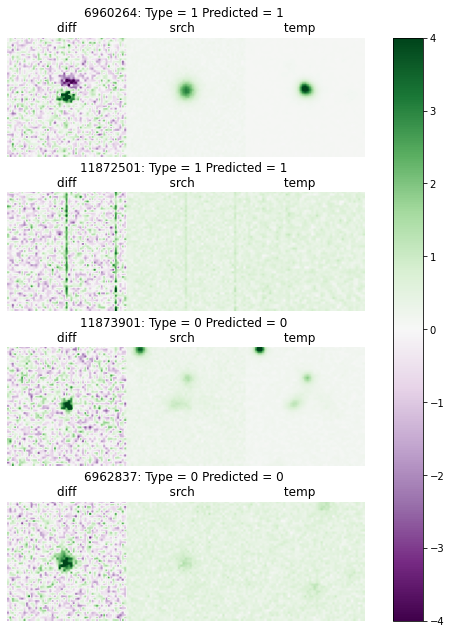

In [47]:
fig, ax = plt.subplots(4,1,figsize=(9,9))
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, -0.1, 0.3)

# for i in range(4):
#     ax[i].axis("off")
#     ax[i].imshow(np.hstack(data_norm[i*3:i*3+3]))
#     ax[i].set_title('{}: Type = {}'.format(flist3[i*3].split("/")[-1][4:-5], types[i*3]), fontsize = 12)
    

ax[0].axis("off")
s = ax[0].imshow(f1,cmap = "PRGn", clim = (-4,4))
ax[0].set_title('6960264: Type = 1 Predicted = 1 \ndiff                        srch                       tmpl', fontsize = 12)
ax[1].imshow(s1,cmap = "PRGn", clim = (-4,4))
ax[1].axis("off")
ax[1].set_title('11872501: Type = 1 Predicted = 1 \ndiff                        srch                       tmpl', fontsize = 12)
ax[2].axis("off")
ax[2].imshow(f0,cmap = "PRGn", clim = (-4,4))
ax[2].set_title('11873901: Type = 0 Predicted = 0 \ndiff                        srch                       tmpl', fontsize = 12)
ax[3].axis("off")
ax[3].imshow(s0,cmap = "PRGn", clim = (-4,4))
ax[3].set_title('6962837: Type = 0 Predicted = 0 \ndiff                        srch                       tmpl', fontsize = 12)

# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax)
fig.colorbar(s, ax=ax)

plt.savefig("3dex_new_test.pdf")

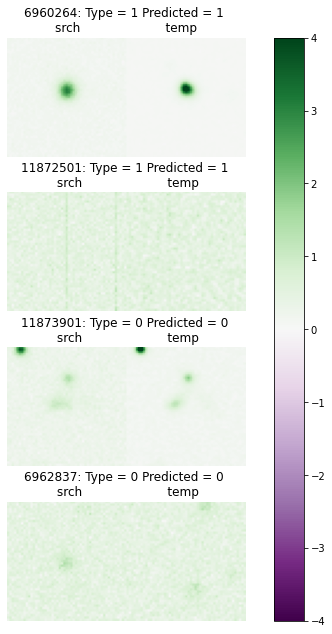

In [48]:
fig, ax = plt.subplots(4,1,figsize=(9,9))
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, -0.1, 0.3)

# for i in range(4):
#     ax[i].axis("off")
#     ax[i].imshow(np.hstack(data_norm[i*3:i*3+3]))
#     ax[i].set_title('{}: Type = {}'.format(flist3[i*3].split("/")[-1][4:-5], types[i*3]), fontsize = 12)
    

ax[0].axis("off")
s = ax[0].imshow(f1[:,51:],cmap = "PRGn", clim = (-4,4))
ax[0].set_title('6960264: Type = 1 Predicted = 1 \nsrch                      temp', fontsize = 12)
ax[1].imshow(s1[:,51:],cmap = "PRGn", clim = (-4,4))
ax[1].axis("off")
ax[1].set_title('11872501: Type = 1 Predicted = 1 \n srch                      temp', fontsize = 12)
ax[2].axis("off")
ax[2].imshow(f0[:,51:],cmap = "PRGn", clim = (-4,4))
ax[2].set_title('11873901: Type = 0 Predicted = 0 \n srch                      temp', fontsize = 12)
ax[3].axis("off")
ax[3].imshow(s0[:,51:],cmap = "PRGn", clim = (-4,4))
ax[3].set_title('6962837: Type = 0 Predicted = 0 \n srch                      temp', fontsize = 12)

# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax)
fig.colorbar(s, ax=ax)

# plt.savefig("2dex_new_test.pdf")

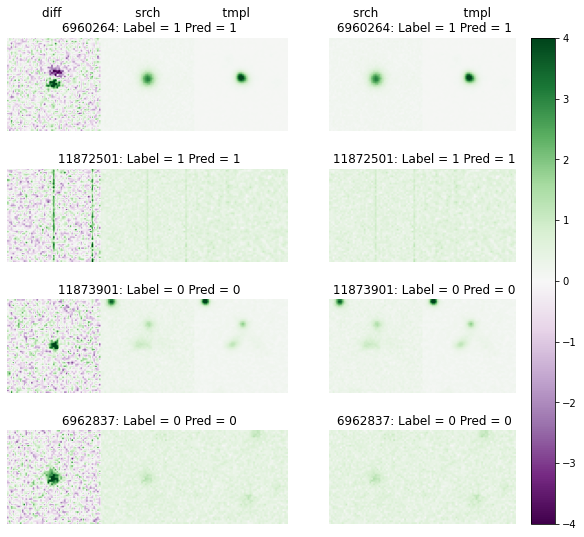

In [55]:
fig, ax = plt.subplots(4,2,figsize=(9,9))
fig.subplots_adjust(0.05, 0.2, 0.95, 0.95, -0.1, 0.4)

# for i in range(4):
#     ax[i].axis("off")
#     ax[i].imshow(np.hstack(data_norm[i*3:i*3+3]))
#     ax[i].set_title('{}: Type = {}'.format(flist3[i*3].split("/")[-1][4:-5], types[i*3]), fontsize = 12)
    

ax[0,0].axis("off")
s = ax[0,0].imshow(f1,cmap = "PRGn", clim = (-4,4))
ax[0,0].set_title('diff                   srch                tmpl \n 6960264: Label = 1 Pred = 1', fontsize = 12)
ax[1,0].imshow(s1,cmap = "PRGn", clim = (-4,4))
ax[1,0].axis("off")
ax[1,0].set_title('\n 11872501: Label = 1 Pred = 1', fontsize = 12)
ax[2,0].axis("off")
ax[2,0].imshow(f0,cmap = "PRGn", clim = (-4,4))
ax[2,0].set_title('\n 11873901: Label = 0 Pred = 0', fontsize = 12)
ax[3,0].axis("off")
ax[3,0].imshow(s0,cmap = "PRGn", clim = (-4,4))
ax[3,0].set_title('\n 6962837: Label = 0 Pred = 0', fontsize = 12)

# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax)
# fig.colorbar(s, ax=ax[:,0])

# plt.savefig("3dex_new_test.pdf")


# fig, ax = plt.subplots(4,1,figsize=(9,9))
# fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, -0.1, 0.3)

# for i in range(4):
#     ax[i].axis("off")
#     ax[i].imshow(np.hstack(data_norm[i*3:i*3+3]))
#     ax[i].set_title('{}: Type = {}'.format(flist3[i*3].split("/")[-1][4:-5], types[i*3]), fontsize = 12)
    

ax[0,1].axis("off")
s = ax[0,1].imshow(f1[:,51:],cmap = "PRGn", clim = (-4,4))
ax[0,1].set_title('srch                      tmpl\n 6960264: Label = 1 Pred = 1', fontsize = 12)
ax[1,1].imshow(s1[:,51:],cmap = "PRGn", clim = (-4,4))
ax[1,1].axis("off")
ax[1,1].set_title('\n 11872501: Label = 1 Pred = 1', fontsize = 12)
ax[2,1].axis("off")
ax[2,1].imshow(f0[:,51:],cmap = "PRGn", clim = (-4,4))
ax[2,1].set_title('\n 11873901: Label = 0 Pred = 0', fontsize = 12)
ax[3,1].axis("off")
ax[3,1].imshow(s0[:,51:],cmap = "PRGn", clim = (-4,4))
ax[3,1].set_title('\n 6962837: Label = 0 Pred = 0', fontsize = 12)

# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax)
fig.colorbar(s, ax=ax[:,1])

plt.savefig("32dex_new_test.pdf")

plt.show()


In [15]:
imges_train = np.zeros((4*3,51,51))

In [16]:

imges_train[0] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/diff6960264.fits')[0].data
imges_train[1] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/srch6960264.fits')[0].data
imges_train[2] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/temp6960264.fits')[0].data
imges_train[3] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20140209/498352745/diff11872501.fits')[0].data
imges_train[4] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20140209/498352745/srch11872501.fits')[0].data
imges_train[5] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20140209/498352745/temp11872501.fits')[0].data
imges_train[6] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20140209/498151557/diff11873901.fits')[0].data
imges_train[7] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20140209/498151557/srch11873901.fits')[0].data
imges_train[8] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20140209/498151557/temp11873901.fits')[0].data
imges_train[9] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20130829/470681009/diff6962837.fits')[0].data
imges_train[10] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20130829/470681009/srch6962837.fits')[0].data
imges_train[11] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20130829/470681009/temp6962837.fits')[0].data


In [17]:
imges_train[0] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/temp6960264.fits')[0].data
imges_train[1] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/srch6960264.fits')[0].data
imges_train[2] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20130829/470681007/diff6960264.fits')[0].data
imges_train[3] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20140209/498352745/temp11872501.fits')[0].data
imges_train[4] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20140209/498352745/srch11872501.fits')[0].data
imges_train[5] = fits.open('../data/stamps9/SNWG/Archive/2013/Y1/20140209/498352745/diff11872501.fits')[0].data
imges_train[6] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20140209/498151557/temp11873901.fits')[0].data
imges_train[7] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20140209/498151557/srch11873901.fits')[0].data
imges_train[8] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20140209/498151557/diff11873901.fits')[0].data
imges_train[9] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20130829/470681009/temp6962837.fits')[0].data
imges_train[10] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20130829/470681009/srch6962837.fits')[0].data
imges_train[11] = fits.open('../data/stamps2/SNWG/Archive/2013/Y1/20130829/470681009/diff6962837.fits')[0].data


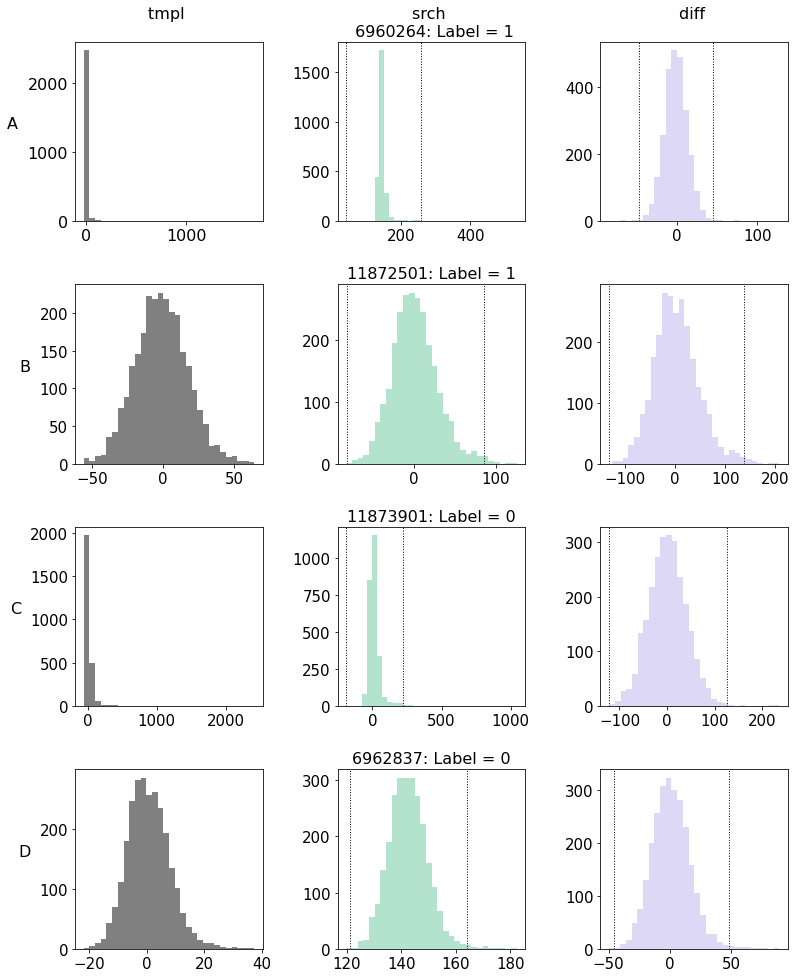

In [22]:
fig, ax = plt.subplots(4,3,figsize=(11,14))
# ax.axis("off")
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.4, 0.35)
k = 0
for j in range(3):
    if k < 3:
        m = np.mean(imges_train[(0*3) + k])
        s = np.std(imges_train[(0*3) + k])
        ax[0, j].hist(imges_train[(0*3) + k].flatten(),bins=30, color ="gray")
        ax[0, 0].set_ylabel("A", labelpad = 15,fontsize=16, rotation = 360)
        ax[0, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)
        if j != 0:
            ax[0, j].axvline(m-3*s, color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[0, j].axvline(m+3*s,color = "black", alpha = 1, linewidth=1, linestyle=':')
            if j == 1: 
                ax[0, j].hist(imges_train[(0*3) + k].flatten(),bins=30, color ="#b3e2cd")
            else:
                ax[0, j].hist(imges_train[(0*3) + k].flatten(),bins=30, color ="#ddd8f5")

        ax[0, 1].set_title('srch \n 6960264: Label = 1',fontsize = 16)
        ax[0, 1].tick_params(axis = 'both', which = 'major', labelsize = 15)
        ax[0, 0].set_title('tmpl \n',fontsize = 16)
        ax[0, 2].set_title('diff \n',fontsize = 16)
        ax[0, 2].tick_params(axis = 'both', which = 'major', labelsize = 15)
        
        m = np.mean(imges_train[(1*3) + k])
        s = np.std(imges_train[(1*3) + k])
        ax[1, j].hist(imges_train[(1*3) + k].flatten(),bins=30, color ="gray")
        ax[1, 0].set_ylabel("B",labelpad = 15, fontsize=16, rotation = 360)
        if j != 0:
            ax[1, j].axvline(m-3*s,color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[1, j].axvline(m+3*s,color = "black", alpha = 1, linewidth=1, linestyle=':')
            if j == 1:
                ax[1, j].hist(imges_train[(1*3) + k].flatten(),bins=30, color ="#b3e2cd")
            else:
                ax[1, j].hist(imges_train[(1*3) + k].flatten(),bins=30, color ="#ddd8f5")


        ax[1, 1].set_title('11872501: Label = 1',fontsize = 16)
        # ax[1, 0].set_title('tmpl',fontsize = 16)
        ax[1, 0].tick_params(axis = 'both', which = 'major', labelsize = 15)
        ax[1, 1].tick_params(axis = 'both', which = 'major', labelsize = 15)
        # ax[1, 2].set_title('diff',fontsize = 16)
        ax[1, 2].tick_params(axis = 'both', which = 'major', labelsize = 15)
        
        m = np.mean(imges_train[(2*3) + k])
        s = np.std(imges_train[(2*3) + k])
        ax[2, j].hist(imges_train[(2*3) + k].flatten(),bins=30, color ="gray")
        ax[2, 0].set_ylabel("C",labelpad = 15, fontsize=16, rotation = 360)
        if j != 0:
            ax[2, j].axvline(m-3*s,color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[2, j].axvline(m+3*s,color = "black", alpha = 1, linewidth=1, linestyle=':')
            if j == 1:
                ax[2, j].hist(imges_train[(2*3) + k].flatten(),bins=30, color ="#b3e2cd")
            else:
                ax[2, j].hist(imges_train[(2*3) + k].flatten(),bins=30, color ="#ddd8f5")

                
        ax[2, 1].set_title('11873901: Label = 0',fontsize = 16)
        ax[2, 1].tick_params(axis = 'both', which = 'major', labelsize = 15)
        # ax[2, 0].set_title('tmpl',fontsize = 16)
        ax[2, 0].tick_params(axis = 'both', which = 'major', labelsize = 15)
        # ax[2, 2].set_title('diff',fontsize = 16)
        ax[2, 2].tick_params(axis = 'both', which = 'major', labelsize = 15)
        
        m = np.mean(imges_train[(3*3) + k])
        s = np.std(imges_train[(3*3) + k])
        ax[3, j].hist(imges_train[(3*3) + k].flatten(),bins=30, color ="gray")
        ax[3, 0].set_ylabel("D",labelpad = 15, fontsize=16, rotation = 360)
        if j != 0:
            ax[3, j].axvline(m-3*s,color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[3, j].axvline(m+3*s,color = "black", alpha = 1, linewidth=1, linestyle=':')
            if j == 1:
                ax[3, j].hist(imges_train[(3*3) + k].flatten(),bins=30, color ="#b3e2cd")
            else:
                ax[3, j].hist(imges_train[(3*3) + k].flatten(),bins=30, color ="#ddd8f5")


        ax[3, 1].set_title('6962837: Label = 0',fontsize = 16)
        ax[3, 1].tick_params(axis = 'both', which = 'major', labelsize = 15)
        # ax[3, 0].set_title('tmpl',fontsize = 16)
        ax[3, 0].tick_params(axis = 'both', which = 'major', labelsize = 15)
        # ax[3, 2].set_title('diff',fontsize = 16)
        ax[3, 2].tick_params(axis = 'both', which = 'major', labelsize = 15)
        k = k+1
# lightseagreen
plt.savefig("histnonorm_new_test_colors.pdf",bbox_inches ="tight")

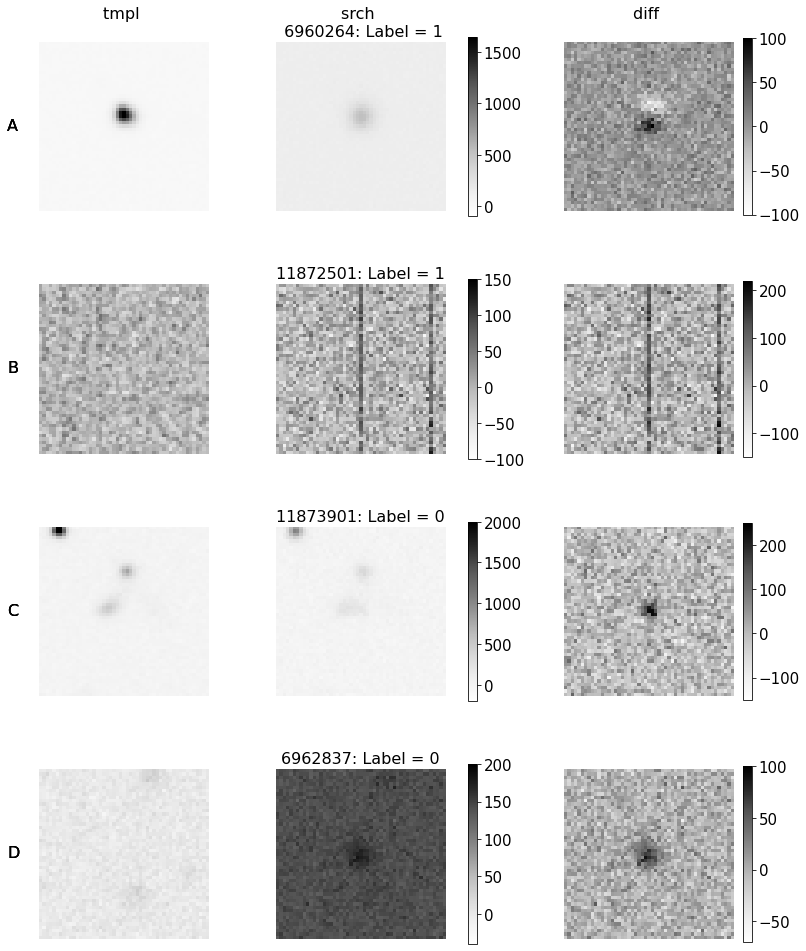

In [24]:
fig, ax = plt.subplots(4,3,figsize=(11,14))

fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.4, 0.35)
k = 0
for j in range(3):
    if k < 3:
        if k != 2:
            cmst0 = ax[0, j].imshow(imges_train[(0*3) + k],cmap = "Greys", clim = (-100,1650))
        else:
            cmd0 = ax[0, j].imshow(imges_train[(0*3) + k],cmap = "Greys", clim = (-100,100))
            # Plot vertical colorbar
            dfiif1 = fig.colorbar(cmd0, ax = ax[0, j], fraction=0.047)
            dfiif1.ax.tick_params(labelsize=15)
        ax[0, j].axis("off")    
        ax[0, 1].set_title('srch \n 6960264: Label = 1',fontsize = 16)
        ax[0, 0].set_title('tmpl \n ',fontsize = 16)
        ax[0, 2].set_title('diff \n ',fontsize = 16)
        ax[0, 0].text(-10, 26, "A", fontsize=16)
#         ax[0, 0].set_ylabel("A", fontsize=16, rotation = 360)
#         ax[0, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)
        
        if k == 2:
            cmd1 = ax[1, j].imshow(imges_train[(1*3) + k],cmap = "Greys", clim = (-150,220))
            dfiif = fig.colorbar(cmd1, ax = ax[1, j], fraction=0.047)
            dfiif.ax.tick_params(labelsize=15)
        else:
            cmst1 = ax[1, j].imshow(imges_train[(1*3) + k],cmap = "Greys", clim = (-100,150))
        ax[1, j].axis("off")
        ax[1, 1].set_title('11872501: Label = 1',fontsize = 16)
        # ax[1, 0].set_title('temp',fontsize = 16)
        # ax[1, 2].set_title('diff',fontsize = 16)
        ax[1, 0].text(-10, 26, "B", fontsize=16)
        
        if k == 2:
            cmd2 = ax[2, j].imshow(imges_train[(2*3) + k],cmap = "Greys", clim = (-150,250))
            dfiif2 = fig.colorbar(cmd2, ax = ax[2, j], fraction=0.047)
            dfiif2.ax.tick_params(labelsize=15)
        else:
            cmst2 = ax[2, j].imshow(imges_train[(2*3) + k],cmap = "Greys", clim = (-200,2000))
        ax[2, j].axis("off")
        ax[2, 1].set_title('11873901: Label = 0',fontsize = 16)
        # ax[2, 0].set_title('temp',fontsize = 16)
        # ax[2, 2].set_title('diff',fontsize = 16)
        ax[2, 0].text(-10, 26, "C", fontsize=16)
        
        if k == 2:       
            cmd3 = ax[3, j].imshow(imges_train[(3*3) + k],cmap = "Greys", clim = (-70,100))
            dfiif3 = fig.colorbar(cmd3, ax = ax[3, j], fraction=0.047)
            dfiif3.ax.tick_params(labelsize=15)
        else:
            cmst3 = ax[3, j].imshow(imges_train[(3*3) + k],cmap = "Greys", clim = (-40,200))
        ax[3, j].axis("off")
        ax[3, 1].set_title('6962837: Label = 0',fontsize = 16)
        # ax[3, 0].set_title('temp',fontsize = 16)
        # ax[3, 2].set_title('diff',fontsize = 16)
        ax[3, 0].text(-10, 26, "D", fontsize=16)
        k = k+1
        
cmst0s = fig.colorbar(cmst0, ax = ax[0, :2],fraction=0.047)
cmst1s = fig.colorbar(cmst1, ax = ax[1, :2],fraction=0.047)
cmst2s = fig.colorbar(cmst2, ax = ax[2, :2],fraction=0.047)
cmst3s = fig.colorbar(cmst3, ax = ax[3, :2],fraction=0.047)
cmst0s.ax.tick_params(labelsize=15)
cmst1s.ax.tick_params(labelsize=15)
cmst2s.ax.tick_params(labelsize=15)
cmst3s.ax.tick_params(labelsize=15)

# fig.colorbar(s, ax=ax)
# fig.colorbar(s1, ax=ax)
plt.savefig("nonorm_new_test.pdf")

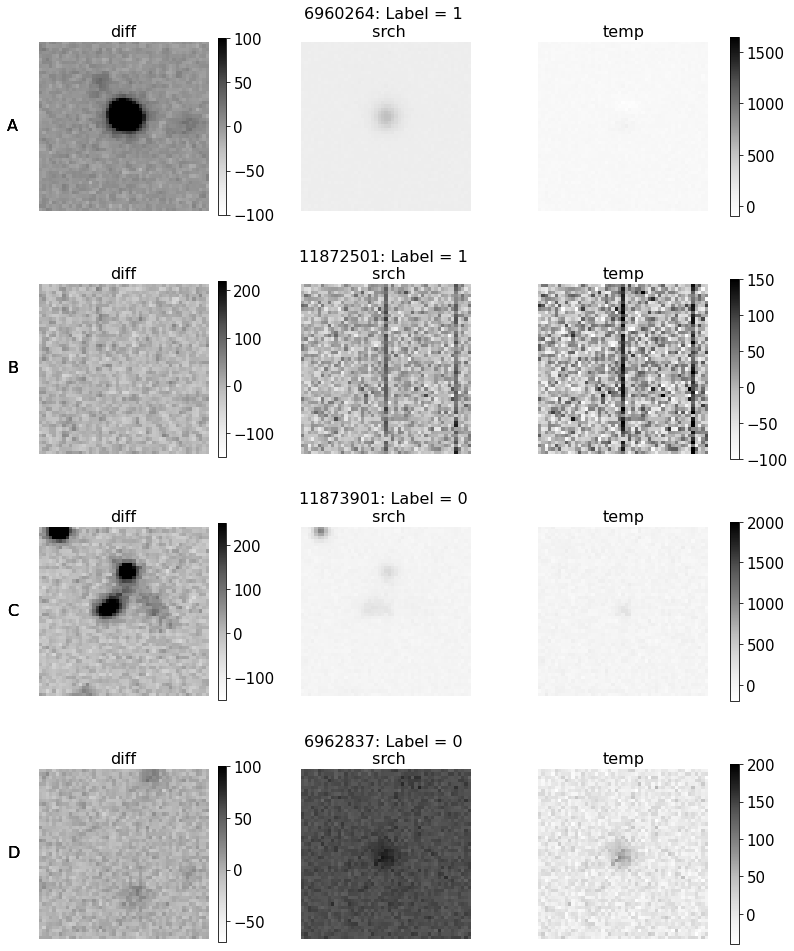

In [59]:
fig, ax = plt.subplots(4,3,figsize=(11,14))

fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.4, 0.35)
k = 0
for j in range(3):
    if k < 3:
        if k != 0:
            cmst0 = ax[0, j].imshow(imges_train[(0*3) + k],cmap = "Greys", clim = (-100,1650))
        else:
            cmd0 = ax[0, j].imshow(imges_train[(0*3) + k],cmap = "Greys", clim = (-100,100))
            # Plot vertical colorbar
            dfiif1 = fig.colorbar(cmd0, ax = ax[0, j], fraction=0.047)
            dfiif1.ax.tick_params(labelsize=15)
        ax[0, j].axis("off")    
        ax[0, 1].set_title('6960264: Label = 1 \n srch',fontsize = 16)
        ax[0, 0].set_title('diff',fontsize = 16)
        ax[0, 2].set_title('temp',fontsize = 16)
        ax[0, 0].text(-10, 26, "A", fontsize=16)
#         ax[0, 0].set_ylabel("A", fontsize=16, rotation = 360)
#         ax[0, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)
        
        if k == 0:
            cmd1 = ax[1, j].imshow(imges_train[(1*3) + k],cmap = "Greys", clim = (-150,220))
            dfiif = fig.colorbar(cmd1, ax = ax[1, j], fraction=0.047)
            dfiif.ax.tick_params(labelsize=15)
        else:
            cmst1 = ax[1, j].imshow(imges_train[(1*3) + k],cmap = "Greys", clim = (-100,150))
        ax[1, j].axis("off")
        ax[1, 1].set_title('11872501: Label = 1 \n srch',fontsize = 16)
        ax[1, 0].set_title('diff',fontsize = 16)
        ax[1, 2].set_title('temp',fontsize = 16)
        ax[1, 0].text(-10, 26, "B", fontsize=16)
        
        if k == 0:
            cmd2 = ax[2, j].imshow(imges_train[(2*3) + k],cmap = "Greys", clim = (-150,250))
            dfiif2 = fig.colorbar(cmd2, ax = ax[2, j], fraction=0.047)
            dfiif2.ax.tick_params(labelsize=15)
        else:
            cmst2 = ax[2, j].imshow(imges_train[(2*3) + k],cmap = "Greys", clim = (-200,2000))
        ax[2, j].axis("off")
        ax[2, 1].set_title('11873901: Label = 0 \n srch',fontsize = 16)
        ax[2, 0].set_title('diff',fontsize = 16)
        ax[2, 2].set_title('temp',fontsize = 16)
        ax[2, 0].text(-10, 26, "C", fontsize=16)
        
        if k == 0:       
            cmd3 = ax[3, j].imshow(imges_train[(3*3) + k],cmap = "Greys", clim = (-70,100))
            dfiif3 = fig.colorbar(cmd3, ax = ax[3, j], fraction=0.047)
            dfiif3.ax.tick_params(labelsize=15)
        else:
            cmst3 = ax[3, j].imshow(imges_train[(3*3) + k],cmap = "Greys", clim = (-40,200))
        ax[3, j].axis("off")
        ax[3, 1].set_title('6962837: Label = 0 \n srch',fontsize = 16)
        ax[3, 0].set_title('diff',fontsize = 16)
        ax[3, 2].set_title('temp',fontsize = 16)
        ax[3, 0].text(-10, 26, "D", fontsize=16)
        k = k+1
        
cmst0s = fig.colorbar(cmst0, ax = ax[0, 1:],fraction=0.047)
cmst1s = fig.colorbar(cmst1, ax = ax[1, 1:],fraction=0.047)
cmst2s = fig.colorbar(cmst2, ax = ax[2, 1:],fraction=0.047)
cmst3s = fig.colorbar(cmst3, ax = ax[3, 1:],fraction=0.047)
cmst0s.ax.tick_params(labelsize=15)
cmst1s.ax.tick_params(labelsize=15)
cmst2s.ax.tick_params(labelsize=15)
cmst3s.ax.tick_params(labelsize=15)

# fig.colorbar(s, ax=ax)
# fig.colorbar(s1, ax=ax)
# plt.savefig("nonorm_new_test.pdf")

In [26]:
values = imges_train[1::3].flatten()
values = values.reshape(4, 51*51)
values.shape

(4, 2601)

In [27]:
srch = pd.DataFrame({"ID": np.concatenate((["6960264"]*51*51,["11872501"]*51*51,["11873901"]*51*51,["6962837"]*51*51)),
              "values": values.flatten(), 
              "img": np.concatenate((["srch"]*51*51,["srch"]*51*51,["srch"]*51*51,["srch"]*51*51))} )

m = np.mean(srch[srch["ID"]=="6960264"]["values"])
s = np.std(srch[srch["ID"]=="6960264"]["values"])
mini = m - 3*s
maxi = m + 3*s
srch1 = srch[(srch["values"]>= mini)&(srch["values"]<= maxi)&(srch["ID"]=="6960264")]    

m = np.mean(srch[srch["ID"]=="11872501"]["values"])
s = np.std(srch[srch["ID"]=="11872501"]["values"])
mini = m - 3*s
maxi = m + 3*s
srch2 = srch[(srch["values"]>= mini)&(srch["values"]<= maxi)&(srch["ID"]=="11872501")]

m = np.mean(srch[srch["ID"]=="11873901"]["values"])
s = np.std(srch[srch["ID"]=="11873901"]["values"])
mini = m - 3*s
maxi = m + 3*s
srch3 = srch[(srch["values"]>= mini)&(srch["values"]<= maxi)&(srch["ID"]=="11873901")]
            
m = np.mean(srch[srch["ID"]=="6962837"]["values"])
s = np.std(srch[srch["ID"]=="6962837"]["values"])
mini = m - 3*s
maxi = m + 3*s
srch4 = srch[(srch["values"]>= mini)&(srch["values"]<= maxi)&(srch["ID"]=="6962837")]


srch = pd.concat((srch1,srch2,srch3,srch4))
srch

,ID,values,img
0,6960264,142.265854,srch
1,6960264,150.123978,srch
2,6960264,145.357620,srch
3,6960264,132.669235,srch
4,6960264,145.725525,srch
...,...,...,...
10399,6962837,152.140228,srch
10400,6962837,150.320755,srch
10401,6962837,132.517670,srch
10402,6962837,156.770462,srch


In [28]:
values = imges_train[2::3].flatten()
values = values.reshape(4, 51*51)
values.shape

(4, 2601)

In [35]:
temp = pd.DataFrame({"ID": np.concatenate((["6960264"]*51*51,["11872501"]*51*51,["11873901"]*51*51,["6962837"]*51*51)),
              "values": values.flatten(), 
              "img": np.concatenate((["tmpl"]*51*51,["tmpl"]*51*51,["tmpl"]*51*51,["tmpl"]*51*51))} )
m = np.mean(temp[temp["ID"]=="6960264"]["values"])
s = np.std(temp[temp["ID"]=="6960264"]["values"])
mini = m - 3*s
maxi = m + 3*s
temp1 = temp[(temp["values"]>= mini)&(temp["values"]<= maxi)&(temp["ID"]=="6960264")]    

m = np.mean(temp[temp["ID"]=="11872501"]["values"])
s = np.std(temp[temp["ID"]=="11872501"]["values"])
mini = m - 3*s
maxi = m + 3*s
temp2 = temp[(temp["values"]>= mini)&(temp["values"]<= maxi)&(temp["ID"]=="11872501")]    

m = np.mean(temp[temp["ID"]=="11873901"]["values"])
s = np.std(temp[temp["ID"]=="11873901"]["values"])
mini = m - 3*s
maxi = m + 3*s
temp3 = temp[(temp["values"]>= mini)&(temp["values"]<= maxi)&(temp["ID"]=="11873901")]    

m = np.mean(temp[temp["ID"]=="6962837"]["values"])
s = np.std(temp[temp["ID"]=="6962837"]["values"])
mini = m - 3*s
maxi = m + 3*s
temp4 = temp[(temp["values"]>= mini)&(temp["values"]<= maxi)&(temp["ID"]=="6962837")]    

temp = pd.concat((temp1,temp2,temp3,temp4))
temp


,ID,values,img
0,6960264,-3.945832,tmpl
1,6960264,14.399302,tmpl
2,6960264,5.229853,tmpl
3,6960264,-22.198742,tmpl
4,6960264,7.031276,tmpl
...,...,...,...
10399,6962837,21.785061,tmpl
10400,6962837,18.790491,tmpl
10401,6962837,-20.888666,tmpl
10402,6962837,32.693134,tmpl


In [36]:
st = pd.concat([srch, temp], axis=0)
st

,ID,values,img
0,6960264,142.265854,srch
1,6960264,150.123978,srch
2,6960264,145.357620,srch
3,6960264,132.669235,srch
4,6960264,145.725525,srch
...,...,...,...
10399,6962837,21.785061,tmpl
10400,6962837,18.790491,tmpl
10401,6962837,-20.888666,tmpl
10402,6962837,32.693134,tmpl


In [37]:
st["ID"].unique()

array(['6960264', '11872501', '11873901', '6962837'], dtype=object)

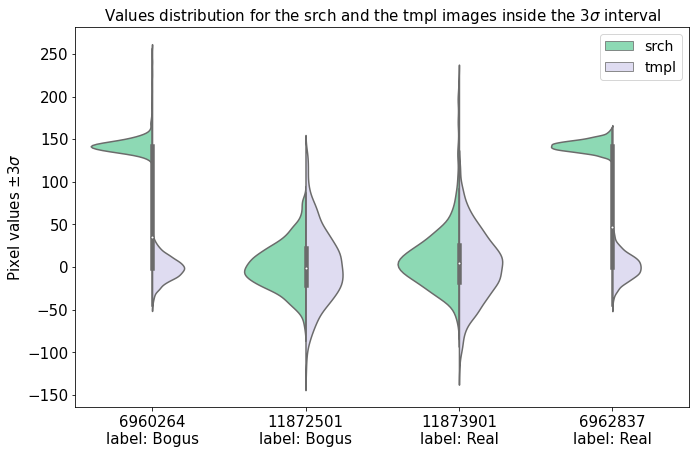

In [38]:
# palette="muted"
fig, ax = plt.subplots(figsize = (11,7))
ax = sns.violinplot(y="values", x="ID", hue="img", 
                    data=st, palette={"srch": "#80e6b4", "tmpl": "#ddd8f5"}, fontsize = 15, split=True)
ax.legend(fontsize = 14)
ax.set_xlabel("")
# ax.set_ylabel(r"Pixel values$")
# ax.set_title(r"Values distribution for the srch and the temp images")
ax.set_ylabel(r"Pixel values $\pm 3\sigma$", fontsize = 15)
ax.set_title(r"Values distribution for the srch and the tmpl images inside the $3\sigma$ interval", fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)# yy = [-110]*4
# label = ["Bogus","Bogus","Real","Real"]
# xx = [-0.1,0.9, 1.93, 2.93]

# for i in range(4):
#     ax.text(xx[i], yy[i], label[i])
    
label = ["Bogus","Bogus","Real","Real"]
ax.set_xticklabels([str(list(x)[0])+"\n"+"label:"+" "+str(list(x)[1]) for x in zip(st["ID"].unique(), label)], fontsize = 15)
    
    
plt.savefig("violin_plot.pdf")

In [39]:
imges_train.shape

(12, 51, 51)

In [40]:
imges_train_norm = open_data.sigma3_norm_data(imges_train)

values = imges_train_norm[1::3].flatten()
values = values.reshape(4, 51*51)
values.shape

(4, 2601)

In [41]:
srch = pd.DataFrame({"ID": np.concatenate((["6960264"]*51*51,["11872501"]*51*51,["11873901"]*51*51,["6962837"]*51*51)),
              "values": values.flatten(), 
              "img": np.concatenate((["srch"]*51*51,["srch"]*51*51,["srch"]*51*51,["srch"]*51*51))} )

In [42]:
values = imges_train_norm[2::3].flatten()
values = values.reshape(4, 51*51)
values.shape

(4, 2601)

In [43]:
temp = pd.DataFrame({"ID": np.concatenate((["6960264"]*51*51,["11872501"]*51*51,["11873901"]*51*51,["6962837"]*51*51)),
              "values": values.flatten(), 
              "img": np.concatenate((["tmpl"]*51*51,["tmpl"]*51*51,["tmpl"]*51*51,["tmpl"]*51*51))} )

In [44]:
st = pd.concat([srch, temp], axis=0)
st

,ID,values,img
0,6960264,0.148809,srch
1,6960264,0.207772,srch
2,6960264,0.172008,srch
3,6960264,0.076801,srch
4,6960264,0.174768,srch
...,...,...,...
10399,6962837,0.722877,tmpl
10400,6962837,0.690703,tmpl
10401,6962837,0.264386,tmpl
10402,6962837,0.840075,tmpl


In [45]:
st[st["ID"] == st["ID"].unique()[2]]["values"].max()

3.7537947483215106

In [46]:
imges_train_norm[(2*3) + 2].flatten().max()

1.4752409057299665

In [47]:
st["ID"].unique()
[str(list(x)[0])+"\n"+str(list(x)[1]) for x in zip(st["ID"].unique(), label)]

['6960264\nBogus', '11872501\nBogus', '11873901\nReal', '6962837\nReal']

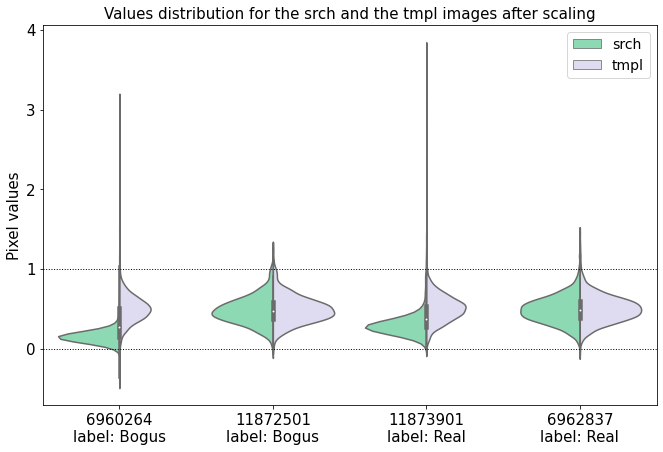

In [49]:
# palette="muted"
fig, ax = plt.subplots(figsize = (11,7))
ax = sns.violinplot(y="values", x="ID", hue="img", 
                    data=st, palette={"srch": "#80e6b4", "tmpl": "#ddd8f5"}, split=True)
ax.set_xlabel("")
ax.legend(fontsize = 14)
# ax.set_ylabel(r"Pixel values$")
# ax.set_title(r"Values distribution for the srch and the temp images")
ax.set_ylabel(r"Pixel values", fontsize = 15)
ax.set_title(r"Values distribution for the srch and the tmpl images after scaling", fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
label = ["Bogus","Bogus","Real","Real"]
ax.set_xticklabels([str(list(x)[0])+"\n"+"label:"+" "+str(list(x)[1]) for x in zip(st["ID"].unique(), label)], fontsize = 15)
ax.axhline(0,color = "black", alpha = 1, linewidth=1, linestyle=':')
ax.axhline(1,color = "black", alpha = 1, linewidth=1, linestyle=':')


plt.savefig("violin_plot_scaling.pdf")
    
    

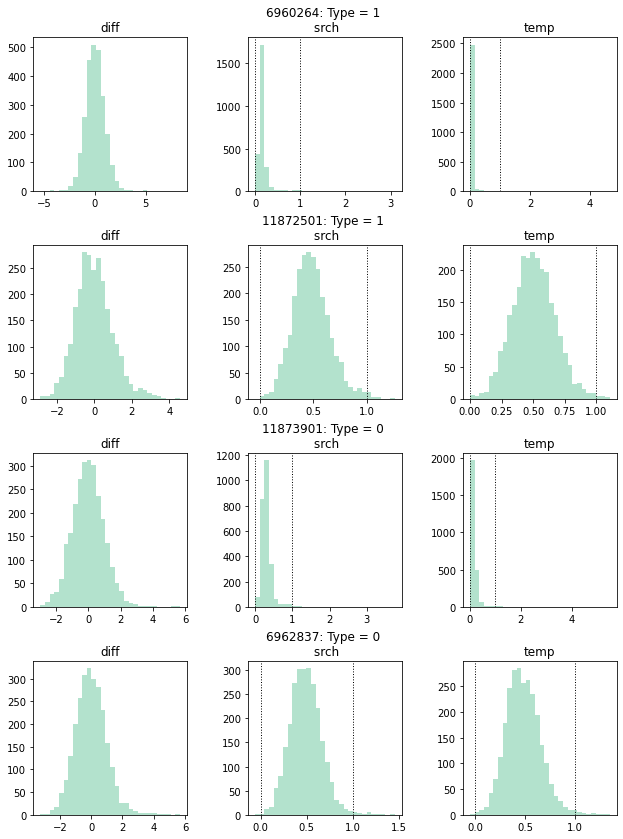

In [63]:
fig, ax = plt.subplots(4,3,figsize=(9,12))
# ax.axis("off")
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.4, 0.35)
k = 0
for j in range(3):
    if k < 3:
#         m = np.mean(imges_train_norm[(0*3) + k])
#         s = np.std(imges_train_norm[(0*3) + k])
        ax[0, j].hist(imges_train_norm[(0*3) + k].flatten(),bins=30, color ="#b3e2cd")
        if j != 0:
            ax[0, j].axvline(0, color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[0, j].axvline(1,color = "black", alpha = 1, linewidth=1, linestyle=':')
        ax[0, 1].set_title('6960264: Type = 1 \n srch',fontsize = 12)
        ax[0, 0].set_title('diff',fontsize = 12)
        ax[0, 2].set_title('temp',fontsize = 12)
        
#         m = np.mean(imges_train[(1*3) + k])
#         s = np.std(imges_train[(1*3) + k])
        ax[1, j].hist(imges_train_norm[(1*3) + k].flatten(),bins=30, color ="#b3e2cd")
        if j != 0:
            ax[1, j].axvline(0,color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[1, j].axvline(1,color = "black", alpha = 1, linewidth=1, linestyle=':')
        ax[1, 1].set_title('11872501: Type = 1 \n srch',fontsize = 12)
        ax[1, 0].set_title('diff',fontsize = 12)
        ax[1, 2].set_title('temp',fontsize = 12)
        
#         m = np.mean(imges_train[(2*3) + k])
#         s = np.std(imges_train[(2*3) + k])
        ax[2, j].hist(imges_train_norm[(2*3) + k].flatten(),bins=30, color ="#b3e2cd")
        if j != 0:
            ax[2, j].axvline(0,color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[2, j].axvline(1,color = "black", alpha = 1, linewidth=1, linestyle=':')
        ax[2, 1].set_title('11873901: Type = 0 \n srch',fontsize = 12)
        ax[2, 0].set_title('diff',fontsize = 12)
        ax[2, 2].set_title('temp',fontsize = 12)
        
#         m = np.mean(imges_train[(3*3) + k])
#         s = np.std(imges_train[(3*3) + k])
        ax[3, j].hist(imges_train_norm[(3*3) + k].flatten(),bins=30, color ="#b3e2cd")
        if j != 0:
            ax[3, j].axvline(0,color = "black", alpha = 1, linewidth=1, linestyle=':')
            ax[3, j].axvline(1,color = "black", alpha = 1, linewidth=1, linestyle=':')
        ax[3, 1].set_title('6962837: Type = 0 \n srch',fontsize = 12)
        ax[3, 0].set_title('diff',fontsize = 12)
        ax[3, 2].set_title('temp',fontsize = 12)
        k = k+1
# lightseagreen
# plt.savefig("histnorm_new_test.pdf")